Pre-processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
#required modules
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math

In [ ]:
url="/content/traffic.csv"
data = pd.read_csv(url)
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Extract and assign components of the datetime to new columns
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['DayOfMonth'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['Second'] = data['DateTime'].dt.second
data['WeekDay'] = data['DateTime'].dt.weekday + 1 # Monday is assigned 1, Tue 2 and so on..

data.head()

,DateTime,Junction,Vehicles,ID,Year,Month,DayOfMonth,Hour,Minute,Second,WeekDay
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,0,0,7
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,0,0,7
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,0,0,7
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,0,0,7
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,0,0,7


In [ ]:
data = data.drop(['ID', 'DateTime', 'Minute', 'Second'], axis=1)


# Display the first few rows of the dataframe to verify the changes
data.head()

,Junction,Vehicles,Year,Month,DayOfMonth,Hour,WeekDay
0,1,15,2015,11,1,0,7
1,1,13,2015,11,1,1,7
2,1,10,2015,11,1,2,7
3,1,7,2015,11,1,3,7
4,1,9,2015,11,1,4,7


In [ ]:
print(data.isna().sum()/data.shape[0]*100)


Junction      0.0
Vehicles      0.0
Year          0.0
Month         0.0
DayOfMonth    0.0
Hour          0.0
WeekDay       0.0
dtype: float64


In [ ]:
sns.set_style("darkgrid")  #theme
warnings.filterwarnings('ignore') #setting up warnings

In [ ]:
data.info() #checking the features that are continous

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Junction    48120 non-null  int64
 1   Vehicles    48120 non-null  int64
 2   Year        48120 non-null  int32
 3   Month       48120 non-null  int32
 4   DayOfMonth  48120 non-null  int32
 5   Hour        48120 non-null  int32
 6   WeekDay     48120 non-null  int32
dtypes: int32(5), int64(2)
memory usage: 1.7 MB


Visualizing Feature-Target dependence:

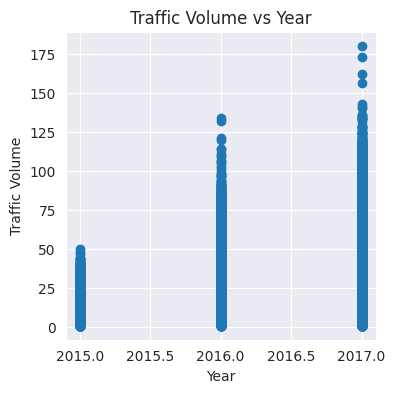

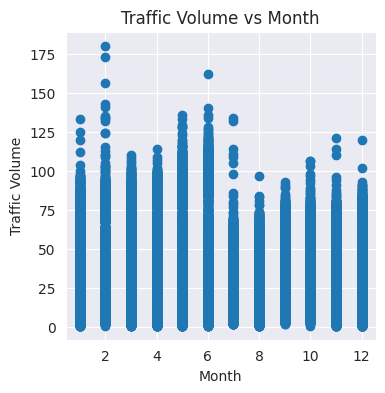

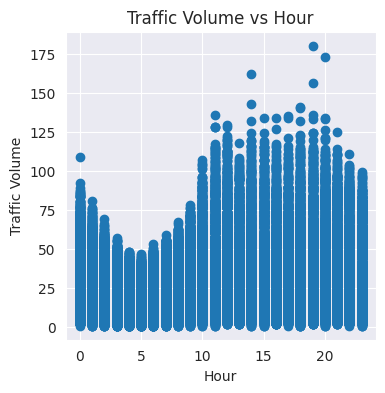

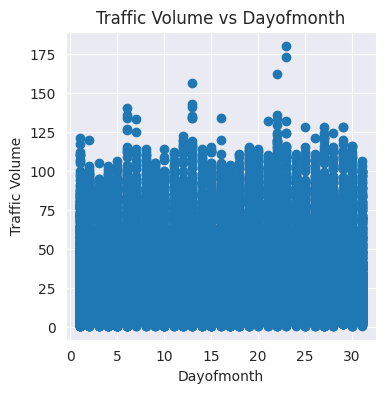

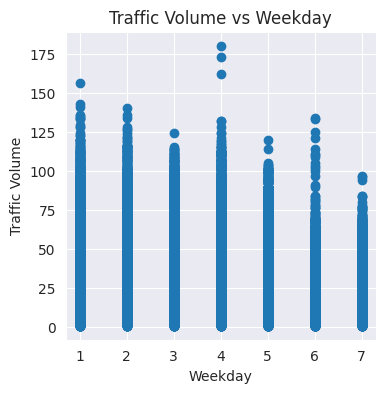

In [ ]:
url="/content/traffic.csv"
data = pd.read_csv(url)
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Extract and assign components of the datetime to new columns
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['DayOfMonth'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['Second'] = data['DateTime'].dt.second
data['WeekDay'] = data['DateTime'].dt.weekday + 1 # Monday is assigned 1, Tue 2 and so on..

data.head()
features = ['Year','Month', 'Hour','DayOfMonth', 'WeekDay']
for feature in features:
    plt.figure(figsize=(4, 4))
    plt.scatter(data[feature], data['Vehicles'])
    plt.title(f'Traffic Volume vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Traffic Volume')
    plt.grid(True)
    plt.show()

We observe there are outlier points situated away from the main cluster of datapoints.
Outliers for TrafficVolume vs Year/Month/Hour/DayofMonth/Weekday tell us about variation in the trafficvolume wrt various features,which can be later analysed for error rectification in our predictions


Split dataset:

In [ ]:
#feature and target split
X = data.drop(columns = ["Vehicles"])
y = data["Vehicles"]

print("Features:", "\n", X[0:5])
print("Target:", "\n", y[0:5])

Features: 
              DateTime  Junction           ID  Year  Month  DayOfMonth  Hour  \
0 2015-11-01 00:00:00         1  20151101001  2015     11           1     0   
1 2015-11-01 01:00:00         1  20151101011  2015     11           1     1   
2 2015-11-01 02:00:00         1  20151101021  2015     11           1     2   
3 2015-11-01 03:00:00         1  20151101031  2015     11           1     3   
4 2015-11-01 04:00:00         1  20151101041  2015     11           1     4   

   Minute  Second  WeekDay  
0       0       0        7  
1       0       0        7  
2       0       0        7  
3       0       0        7  
4       0       0        7  
Target: 
 0    15
1    13
2    10
3     7
4     9
Name: Vehicles, dtype: int64


In [ ]:
import pandas as pd
df =pd.read_csv("/content/traffic.csv")
df_shuffled = df.sample(frac=1).reset_index(drop=True)

# Calculate split indices and split the data
total_rows = df_shuffled.shape[0]
train_idx = int(total_rows * 0.7)
val_idx = train_idx + int(total_rows * 0.2)

train_data = df_shuffled.iloc[:train_idx]
validation_data = df_shuffled.iloc[train_idx:val_idx]
test_data = df_shuffled.iloc[val_idx:]

# separate features and target
X_train, y_train = train_data.drop('Vehicles', axis=1), train_data['Vehicles']
X_val, y_val = validation_data.drop('Vehicles', axis=1), validation_data['Vehicles']
X_test, y_test = test_data.drop('Vehicles', axis=1), test_data['Vehicles']

print("Training Set:\n", X_train, "\n")
print("Validation Set:\n", X_val, "\n")
print("Test Set:\n", X_test, "\n")

Training Set:
                   DateTime  Junction           ID
0      2017-04-28 08:00:00         4  20170428084
1      2016-12-04 01:00:00         3  20161204013
2      2016-12-12 10:00:00         2  20161212102
3      2016-08-30 20:00:00         3  20160830203
4      2016-11-05 09:00:00         1  20161105091
...                    ...       ...          ...
33679  2016-06-01 17:00:00         2  20160601172
33680  2017-04-13 14:00:00         1  20170413141
33681  2017-04-09 15:00:00         4  20170409154
33682  2016-07-15 04:00:00         1  20160715041
33683  2016-03-09 01:00:00         1  20160309011

[33684 rows x 3 columns] 

Validation Set:
                   DateTime  Junction           ID
33684  2017-02-15 02:00:00         2  20170215022
33685  2016-10-01 05:00:00         2  20161001052
33686  2017-06-02 01:00:00         2  20170602012
33687  2016-08-04 19:00:00         3  20160804193
33688  2016-02-28 02:00:00         3  20160228023
...                    ...       ...    

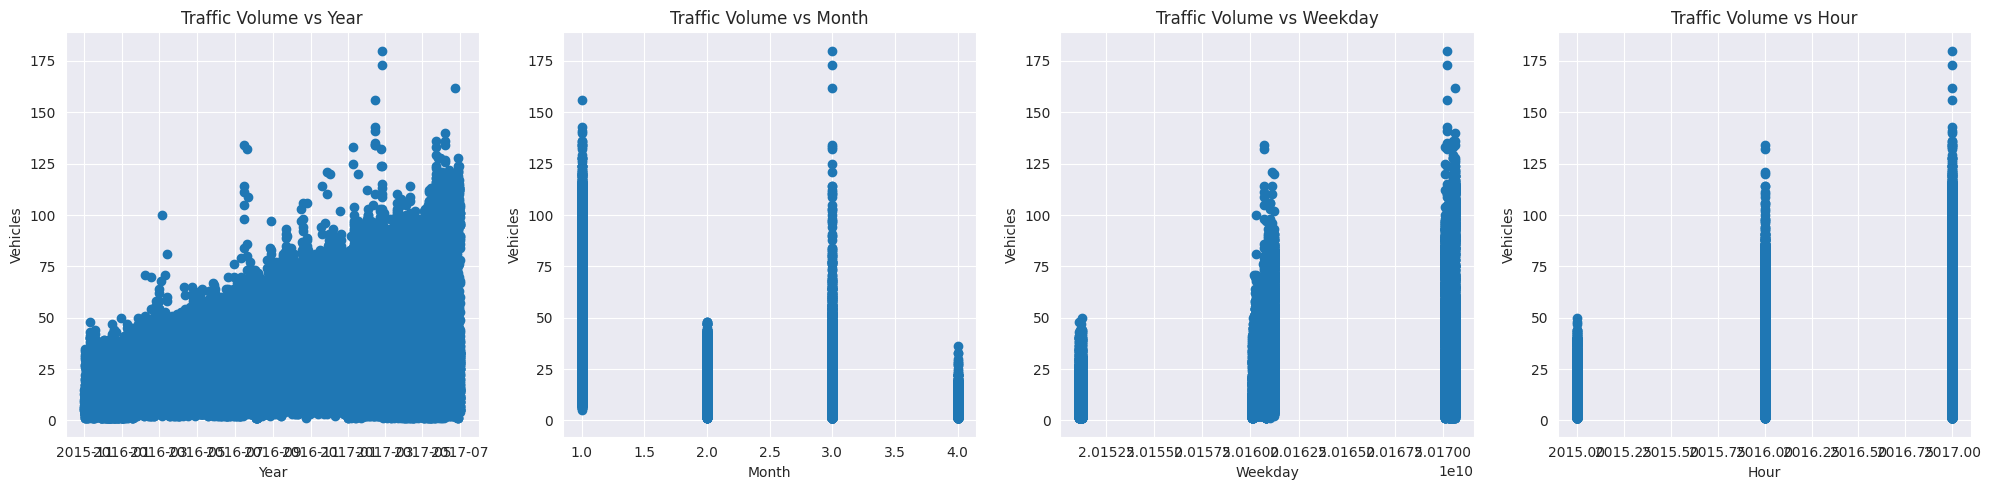

The feature that will have the best split is WeekDay having information gain = 5.778000472282486


In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Define entropy calculation function
def entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

# Define information gain calculation function
def information_gain(X_column, y):
    total_entropy = entropy(y)

    values, counts = np.unique(X_column, return_counts=True)

    weighted_entropy = sum((counts[i] / sum(counts)) * entropy(y[X_column == values[i]]) for i in range(len(values)))

    return total_entropy - weighted_entropy

# Define function to find the best split feature
def best_split(X, y):
    best_gain = 0
    best_feature = 0

    for feature in range(X.shape[1]):
        current_gain = information_gain(X[:, feature], y)
        if current_gain > best_gain:
            best_gain, best_feature = current_gain, feature

    return best_feature, best_gain

# Ensure X is converted to a numpy array if it's a DataFrame
if isinstance(X, pd.DataFrame):
    X = X.values

# Plotting
features = ['Year', 'Month', 'WeekDay', 'Hour']
best_gain = 0
best_feature = None

fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(20, 5))

for i, feature in enumerate(features):
    axes[i].scatter(X[:, i], y)  # Corrected indexing here
    axes[i].set_title(f'Traffic Volume vs {feature.capitalize()}')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Vehicles')
    axes[i].grid(True)

    current_gain = information_gain(X[:, i], y)
    if current_gain > best_gain:
        best_gain = current_gain
        best_feature = feature

plt.tight_layout()
plt.show()

print(f"The feature that will have the best split is {best_feature} having information gain = {best_gain}")






